In [72]:
import pandas as pd
df = pd.read_csv('headline_10000.csv', delimiter=',')#read file
from sklearn.feature_extraction.text import CountVectorizer# import count vec
from sklearn.feature_extraction.text import TfidfVectorizer# import tfidf vec
from sklearn.metrics.pairwise import cosine_similarity# import cossim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

unigram_count = CountVectorizer(encoding='UTF-8', stop_words='english', binary=False)#define count vec
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(df['title'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
tf_feature_names = tf_idf_vectorizor.get_feature_names()
covecs = unigram_count.fit_transform(df['title'])



In [9]:
df['title'][0]#check out the element


(1, 9272)

In [38]:
#Q1
def cosimi10(head,vec):
    cos_sim=cosine_similarity(head, vec)
    sim_sorted_doc_idx = cos_sim.argsort()
    return(df['title'][sim_sorted_doc_idx[0][len(df['title'])-12:len(df['title'])-1]])#return 11 result, because the best match is always the text itself, so we look for the last 11 result

In [39]:
cosimi10(covecs[2],covecs)

8273    Anti-inflammatory medicine can have a benefici...
3483    Taking immunosuppressives, anti-cancer drugs m...
8773    Meatballs might wreck the anti-cancer perks of...
6551    Anti-inflammatory therapy cuts risk of lung ca...
3342    Researchers dispute warning that drugs for hig...
871     Non-steroidal anti-inflammatory drugs linked t...
5708    Colorectal cancer prevention: A proven benefit...
7366    OSA in older adults: Often present, seldom inv...
8313    Anti-inflammatory drugs ineffective for preven...
7923    Hazelnuts improve older adults' micronutrient ...
7631    The link between cognitive function and sexual...
Name: title, dtype: object

In [58]:
cosimi10(tf_idf[2],tf_idf)

872     Self-administered light therapy may improve co...
4747    Surgery, anesthesia not linked to long-term co...
9123    Scientists find a new use for already known an...
9269    Study identifies potential risk factors for co...
7019    Can training improve memory, thinking abilitie...
8273    Anti-inflammatory medicine can have a benefici...
871     Non-steroidal anti-inflammatory drugs linked t...
5708    Colorectal cancer prevention: A proven benefit...
6551    Anti-inflammatory therapy cuts risk of lung ca...
8313    Anti-inflammatory drugs ineffective for preven...
7631    The link between cognitive function and sexual...
Name: title, dtype: object

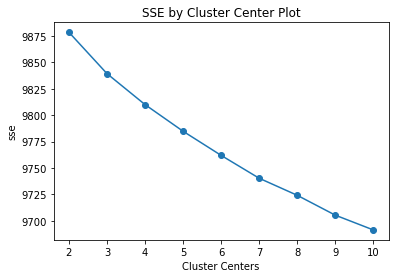

In [70]:
#Q2.
from sklearn.cluster import KMeans#import kmean package
from scipy.stats import zscore#import z score
import matplotlib.pyplot as plt#import plot
def find_optimal_clusters(data, max_k):#define the elbow method
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k,random_state=0, n_init=20).fit(data)
        sse.append(kmeans_model.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('sse')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tf_idf,10)#use the elbow method to find how many cluster is optimized for KMean, it is 8

In [79]:

from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=8, max_iter=10, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)




1

In [80]:

import numpy as np 
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = unigram_count.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)
dfs

[       features     score
 0         study  0.023177
 1        health  0.017455
 2      children  0.014267
 3         brain  0.010922
 4          care  0.010117
 5         women  0.009508
 6           use  0.009504
 7         finds  0.009211
 8        people  0.008901
 9        adults  0.008322
 10        shows  0.007424
 11     research  0.007246
 12  researchers  0.007233
 13         help  0.007014
 14       weight  0.006933,
           features     score
 0             risk  0.143678
 1            heart  0.052920
 2          disease  0.050444
 3           linked  0.037786
 4           higher  0.029926
 5        increased  0.029092
 6         increase  0.027197
 7            death  0.025883
 8         diabetes  0.025256
 9         patients  0.022769
 10      associated  0.020292
 11            high  0.019434
 12          stroke  0.019245
 13           women  0.018905
 14  cardiovascular  0.017728,
       features     score
 0       cancer  0.165966
 1     patients  0.030158
 2      

In [64]:
#Q3
from sklearn.decomposition import NMF, LatentDirichletAllocation# import LDA

In [90]:
no_topics=7
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf_idf)
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
physicians medical money depressed aid coronavirus errors psychosis physician bypass
Topic 1:
trials accelerate needs clinical compares vessel degeneration enables revealed antidepressant
Topic 2:
racial contribute disparities making ethnic hemorrhage play driving unhealthy safer
Topic 3:
day epilepsy ocd think determines chinese mood pancreas lose acids
Topic 4:
care patients study health cancer finds damage treatment brain stem
Topic 5:
medications live american south migraine inequalities healthier aged night prognosis
Topic 6:
risk study cancer patients new disease linked heart health women


In [116]:
#Question D:
lda1 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z1 = lda.fit_transform(tf_idf[0:112])
lda2 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z2 = lda.fit_transform(tf_idf[112:357])
lda3 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z3 = lda.fit_transform(tf_idf[357:761])
lda4 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z4 = lda.fit_transform(tf_idf[761:1289])
lda5 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z5 = lda.fit_transform(tf_idf[1289:1667])
lda6 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z6 = lda.fit_transform(tf_idf[1667:2155])
lda7 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z7 = lda.fit_transform(tf_idf[2155:3288])
lda8 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z8 = lda.fit_transform(tf_idf[3288:4543])
lda9 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z9 = lda.fit_transform(tf_idf[4543:5766])
lda10 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z10 = lda.fit_transform(tf_idf[5766:7017])
lda11 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z11 = lda.fit_transform(tf_idf[7017:7966])
lda12 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z12 = lda.fit_transform(tf_idf[7966:9080])
lda13 = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z13 = lda.fit_transform(tf_idf[9080:10000])